# 6. Advance - Multi-class Classification

## Import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Load data

In [2]:
df_advance = pd.read_csv('weatherAUS_advance.csv')
df_advance['RainTomorrow'] = df_advance['RainTomorrow'].fillna('Unknown')
df_advance.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Khám phá dữ liệu

In [3]:
df_advance.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,145460
unique,3436,49,16,16,16,2,3
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [4]:
df_advance.describe(include=['float'])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df_advance['RainTomorrow'].value_counts()/len(df_advance)

No         0.758394
Yes        0.219146
Unknown    0.022460
Name: RainTomorrow, dtype: float64

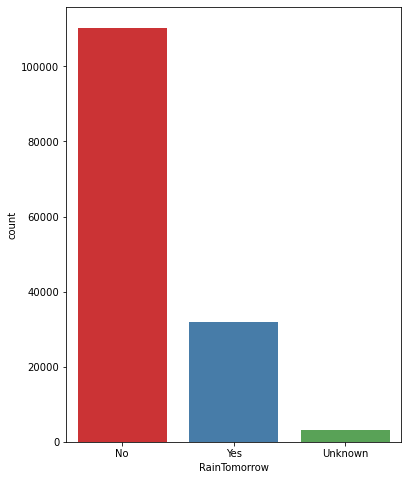

In [6]:
df_advance['RainTomorrow'].value_counts()/len(df_advance)
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x='RainTomorrow', data=df_advance, palette="Set1")
plt.show()

(Khám phá các biến khác đã được thực hiện trong phần 1)

## Tiền xử lý dữ liệu

In [7]:
X = df_advance.drop(['RainTomorrow'], axis=1)
y = df_advance['RainTomorrow']

#### Xử lý Date

In [8]:
X['Date'] = pd.to_datetime(X['Date'], format='%Y-%m-%d')

X['Day_sin'] = np.sin(2 * np.pi * X['Date'].dt.day / 365)
X['Day_cos'] = np.cos(2 * np.pi * X['Date'].dt.day / 365)

X['Month_sin'] = np.sin(2 * np.pi * X['Date'].dt.month / 12)
X['Month_cos'] = np.cos(2 * np.pi * X['Date'].dt.month / 12)

# Year là dữ liệu số nhưng thực ra, nó đóng vai trò biến hạng mục thì hợp lý hơn 
# => do đó convert year sang str để trở thành biến hạng mục
X['Year'] = X['Date'].dt.year.astype(str)
X.drop(['Date'], axis=1, inplace=True)
X.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day_sin,Day_cos,Month_sin,Month_cos,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.017213,0.999852,-2.449294e-16,1.0,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.034422,0.999407,-2.449294e-16,1.0,2008


In [9]:
X.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Day_sin          float64
Day_cos          float64
Month_sin        float64
Month_cos        float64
Year              object
dtype: object

In [10]:
date_columns = ['Day_sin', 'Day_cos', 'Month_sin', 'Month_cos']
categorical = [col for col in X.columns if X[col].dtypes == 'O']
numerical = [col for col in X.columns if X[col].dtypes != 'O' and col not in date_columns]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [11]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Year']

#### Split data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day_sin,Day_cos,Month_sin,Month_cos,Year
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,5.0,7.0,21.4,22.2,No,0.205104,0.978740,1.000000,6.123234e-17,2014
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,3.0,5.0,14.3,23.2,No,0.103102,0.994671,-0.866025,5.000000e-01,2016


#### Xử lý dữ liệu bị khuyết

In [14]:
X_train_nomissing = X_train.copy()
X_test_nomissing = X_test.copy()

In [15]:
# Fill missing values for Numerical columns
for df1 in [X_train_nomissing, X_test_nomissing]:
    for col in numerical:
        col_median = X_train_nomissing[col].median()
        df1[col].fillna(col_median, inplace=True)

In [16]:
# Fill missing values for Categorical columns
for df2 in [X_train_nomissing, X_test_nomissing]:
    for var in categorical:
        df2[var].fillna(X_train_nomissing[var].mode()[0], inplace=True)

In [17]:
# Ensure that there are no missing values
assert X_train_nomissing.isnull().sum().sum() == 0
assert X_test_nomissing.isnull().sum().sum() == 0

#### Xử lý outlier cho các biến số

In [18]:
X_train_no_outliers = X_train_nomissing.copy()
# Xử lý outliers chỉ áp dụng trên tập training

In [19]:
def find_skewed_boundaries(df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

for col in numerical:
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train_no_outliers, col, 3)
    X_train_no_outliers[col]= np.where(X_train_no_outliers[col] > upper_boundary, upper_boundary,
        np.where(X_train_no_outliers[col] < lower_boundary, lower_boundary, X_train_no_outliers[col]))

#### Xử lý dữ liệu Categorical

In [20]:
# Copy data before handling data
X_train_encode = X_train_no_outliers.copy()
X_test_encode = X_test_nomissing.copy()
y_train_encode = y_train.copy()
y_test_encode = y_test.copy()

In [21]:
X_train_encode.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year
count,116368,116368,116368,116368,116368,116368
unique,49,16,16,16,2,11
top,Canberra,W,N,SE,No,2016
freq,2752,16105,17894,12070,90808,14312


In [22]:
y_train_encode.describe(include=['object'])

count     116368
unique         3
top           No
freq       88234
Name: RainTomorrow, dtype: object

Label encoding cho target

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_encode = le.fit_transform(y_train_encode)
y_test_encode = le.transform(y_test_encode)

Mã hóa One-hot với [RainToday, WindGustDir,	WindDir9am,	WindDir3pm]

In [24]:
from feature_engine.encoding import OneHotEncoder
ohe_enc = OneHotEncoder(
    top_categories=None,
    variables=['RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'],  # có thể chọn biến để mã hóa
    drop_last=False)
ohe_enc.fit(X_train_encode)
X_train_encode = ohe_enc.transform(X_train_encode)
X_test_encode = ohe_enc.transform(X_test_encode)

In [25]:
X_train_encode.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_WNW,WindDir3pm_SE,WindDir3pm_ENE,WindDir3pm_W,WindDir3pm_NNW,WindDir3pm_N,WindDir3pm_SSW,WindDir3pm_NE,WindDir3pm_NW
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,...,0,0,0,0,0,0,0,0,0,0
80735,Watsonia,9.3,24.0,0.2,1.6,9.8,48.0,13.0,24.0,74.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train_encode.describe(include=['object'])

,Location,Year
count,116368,116368
unique,49,11
top,Canberra,2016
freq,2752,14312


OrdinalEncoder cho Year

In [27]:
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['Year'])

ordinal_enc.fit(X_train_encode)
X_train_encode = ordinal_enc.transform(X_train_encode)
X_test_encode = ordinal_enc.transform(X_test_encode)
X_train_encode['Year'].value_counts()

1     14312
9     14287
0     14260
7     13469
3     13403
5     13131
4     12382
2     12332
8      6918
6      1826
10       48
Name: Year, dtype: int64

In [28]:
X_train_encode.describe(include=['object'])

,Location
count,116368
unique,49
top,Canberra
freq,2752


OrdinalEncoder cho biến Location

In [29]:
from feature_engine.encoding import OrdinalEncoder
ordinal_enc = OrdinalEncoder(
    # LƯU Ý rằng chúng ta chỉ ra ordered trong encoding_method, nếu không thì nó sẽ gán số bất kỳ
    encoding_method='ordered',
    variables=['Location'])
ordinal_enc.fit(X_train_encode, y_train_encode)
X_train_encode = ordinal_enc.transform(X_train_encode)
X_test_encode = ordinal_enc.transform(X_test_encode)

In [30]:
X_train_encode.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_WNW,WindDir3pm_SE,WindDir3pm_ENE,WindDir3pm_W,WindDir3pm_NNW,WindDir3pm_N,WindDir3pm_SSW,WindDir3pm_NE,WindDir3pm_NW
22926,45,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,...,0,0,0,0,0,0,0,0,0,0
80735,32,9.3,24.0,0.2,1.6,9.8,48.0,13.0,24.0,74.0,...,0,0,0,0,0,0,0,0,0,0


#### Rời rạc hoá dữ liệu số

In [31]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

disc = EqualFrequencyDiscretiser(q=10, variables = numerical + date_columns)

disc.fit(X_train_encode)
X_train_encode = disc.transform(X_train_encode)
X_test_encode = disc.transform(X_test_encode)
X_train_encode[numerical].head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
22926,8,5,0,3,1,8,9,8,5,8,3,3,2,3,7,5
80735,3,5,0,0,3,7,4,7,5,5,5,4,2,2,3,6
121764,4,4,1,0,2,0,0,1,7,3,4,4,0,1,4,5
139821,8,8,0,5,3,6,8,3,0,2,3,2,0,0,8,8
1867,6,2,2,2,1,0,3,2,9,9,3,2,4,4,4,2


## Feature Selection

In [32]:
X_train_processed = X_train_encode.copy()
X_test_processed = X_test_encode.copy()
y_train_processed = y_train_encode.copy()
y_test_processed = y_test_encode.copy()

#### Loại các đặc trưng bị trùng

In [33]:
from feature_engine.selection import DropConstantFeatures

# Constant features will be dropped
transformer = DropConstantFeatures(tol=1)
transformer.fit(X_train_processed)
X_train_processed = transformer.transform(X_train_processed)
X_test_processed = transformer.transform(X_test_processed)
transformer.features_to_drop_

[]

#### Loại bỏ các đặc trưng Quasi-constant


In [34]:
transformer = DropConstantFeatures(tol=0.998)
transformer.fit(X_train_processed)
X_train_processed = transformer.transform(X_train_processed)
X_test_processed = transformer.transform(X_test_processed)
transformer.features_to_drop_

[]

#### Lựa chọn đặc trưng bằng RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=10))
sel_.fit(X_train_processed, y_train_processed)

random_forest_X_train_set = sel_.transform(X_train_processed)
random_forest_X_test_set = sel_.transform(X_test_processed)

In [36]:
X_train_processed.shape, random_forest_X_train_set.shape

((116368, 72), (116368, 24))

## Huấn luyện mô hình

In [37]:
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [38]:
def print_analysis_result(model):
    
    print("Model: ", model)
    
    print()
    print("All features:")
    print('='*40)
    print("Train")
    model.fit(X_train_processed, y_train_processed)
    print("F1 score:", f1_score(y_train_processed, model.predict(X_train_processed), average='weighted'))
    print("Test")
    print("F1 score:", f1_score(y_test_processed, model.predict(X_test_processed), average='weighted'))
    
    print()
    print("Select features with Random Forest:")
    print('='*40)
    print("Train")
    model.fit(random_forest_X_train_set, y_train_processed)
    print("F1 score:", f1_score(y_train_processed, model.predict(random_forest_X_train_set), average='weighted'))
    print("Validation")
    print("F1 score:", f1_score(y_test_processed, model.predict(random_forest_X_test_set), average='weighted'))

    print('='*40)

#### LogisticRegression

In [39]:
model = LogisticRegression()
print_analysis_result(model)

Model:  LogisticRegression()

All features:
Train
F1 score: 0.7994483793403802
Test
F1 score: 0.7994762749050697

Select features with Random Forest:
Train
F1 score: 0.7983837217330468
Validation
F1 score: 0.8000406806520256


#### DecisionTreeClassifier

In [40]:
model = tree.DecisionTreeClassifier()
print_analysis_result(model)

Model:  DecisionTreeClassifier()

All features:
Train
F1 score: 0.9999828136508799
Test
F1 score: 0.7611999398250012

Select features with Random Forest:
Train
F1 score: 0.9999742198750816
Validation
F1 score: 0.7587653980319016


#### AdaBoostClassifier

In [41]:
model = AdaBoostClassifier()
print_analysis_result(model)

Model:  AdaBoostClassifier()

All features:
Train
F1 score: 0.7990787921353327
Test
F1 score: 0.7992996913209918

Select features with Random Forest:
Train
F1 score: 0.8004558477450902
Validation
F1 score: 0.7996529021348825


#### RandomForestClassifier

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state=10)
print_analysis_result(model)

Model:  RandomForestClassifier(random_state=10)

All features:
Train
F1 score: 0.9999656250152141
Test
F1 score: 0.8222132638580012

Select features with Random Forest:
Train
F1 score: 0.999965625542857
Validation
F1 score: 0.8239316046436326


#### MLPClassifier

In [43]:
model = model = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=300)
print_analysis_result(model)

Model:  MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)

All features:
Train
F1 score: 0.8783253183589428
Test
F1 score: 0.8081759235031191

Select features with Random Forest:
Train
F1 score: 0.8493918702753678
Validation
F1 score: 0.8152034244911
